## Archive
### Instrumentalness VS Popularity

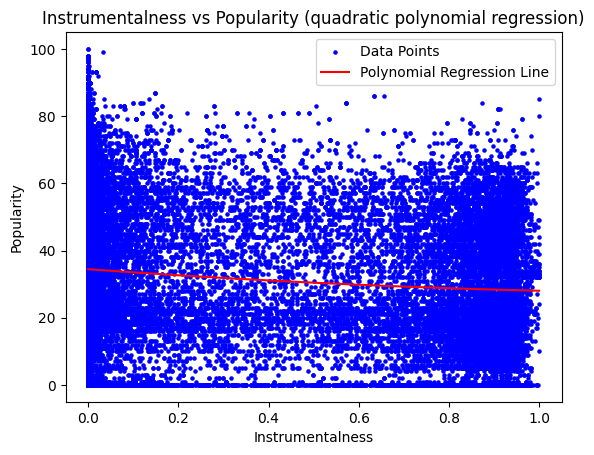

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

random_seed = 42

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=random_seed)

# Second split: separate remaining 80% into 60% training and 20% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Reshape the data to fit the model
X = np.array(spotify_train['instrumentalness']).reshape(-1, 1)  # Independent variable: instrumentalness
y = np.array(spotify_train['popularity'])                       # Dependent variable: popularity

# Perform Polynomial Regression (degree 2 for quadratic)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Initialize and fit the Linear Regression model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values of y based on the polynomial model
y_poly_pred = poly_reg.predict(X_poly)

# Plotting the scatter plot of the original data
plt.scatter(spotify_train['instrumentalness'], spotify_train['popularity'], color='blue', s=5, label="Data Points")

# Sorting the values for a smoother polynomial curve
sorted_zip = sorted(zip(spotify_train['instrumentalness'], y_poly_pred))
X_sorted, y_poly_sorted = zip(*sorted_zip)

# Plotting the polynomial regression curve
plt.plot(X_sorted, y_poly_sorted, color='red', label="Polynomial Regression Line")

# Adding labels and title
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness vs Popularity (quadratic polynomial regression)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculating Evaluation Metrics:
X_val = np.array(spotify_val['energy']).reshape(-1, 1)
y_val = np.array(spotify_val['popularity'])
y_val_pred = linear_reg.predict(X_val) # Predict on validation set

# Calculate metrics for the training set
train_mse = mean_squared_error(y, y_pred) # Mean squared error
train_rmse = np.sqrt(train_mse) # Root mean squared error
train_mae = mean_absolute_error(y, y_pred) # Mean average error
train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

# Calculate metrics for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mad = np.mean(np.abs(y_val - y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print Results:
print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")


ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.